### Michael NANA KAMENI

# Autoregressive Integrated Moving Average (ARIMA)

In [7]:
import pandas as pd
from pandas import Series
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
# !rm "day.csv"


#  Here we are using a dataset on the number of bicycles checkouts from a bike sharing service for a 3 month period

In [8]:
# load in your data "day.csv"
data = pd.read_csv('day.csv')
# preview your data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600.0


In [9]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [10]:
# choose your column : cnt
cnt = data['cnt']
cnt.head()

0     985.0
1     801.0
2    1349.0
3    1562.0
4    1600.0
Name: cnt, dtype: float64

In [11]:
ts = Series(data=cnt.values, index=data['dteday'])

Let's perform a quick plot to understand/visualise what the data looks like.

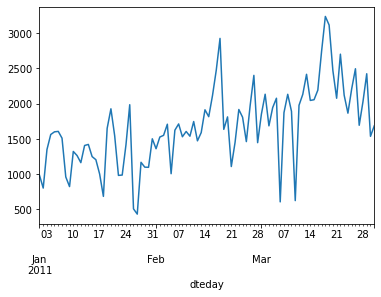

In [12]:
# quick vusalisation
ts.plot()

We can see a general increase in the dataset which we can refer to as a trend.  

This suggests that the time series is not stationary and will require differencing to make it stationary.  
This means we are going to try to take out the trend component: d = 1

## p, d, q (arima parameters)

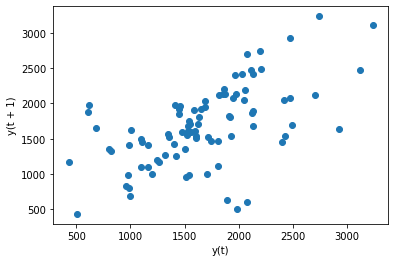

In [13]:
# Let us visualize ana check if there is an autocorrelation in our time series dataset.
pd.plotting.lag_plot(ts);

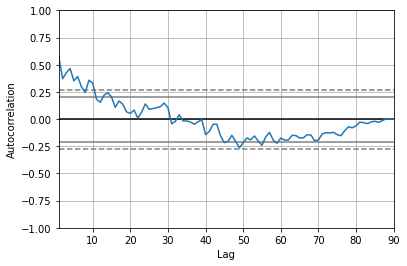

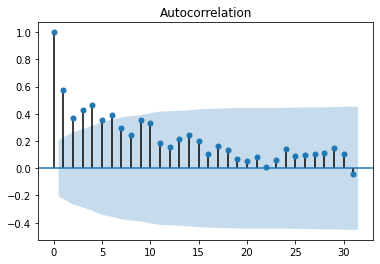

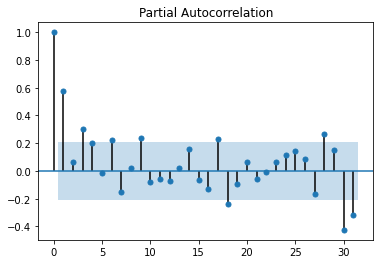

[0.5784504293556518,
 0.3791436051648243,
 0.44241961760167803,
 0.4842138043541384,
 0.36629804208108796,
 0.4137520595456091,
 0.31864284702380863,
 0.26510298370356034,
 0.39648760431773067,
 0.38085130845727677]

In [14]:
# autocorrelate you data
autocorrelation_plot(cnt);
plt.show()
#autocorrelation function
plot_acf(ts, lags=31)
plt.show()
# pacf function
plot_pacf(ts, lags=31)
plt.show()
acf = [ts.autocorr(i) for i in range(1,89)]
acf[:10]

Get your pdq values to experiment with and fit the model

In [15]:
# fit the model
model = ARIMA(ts.values, order=(10, 1, 3))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   89
Model:                ARIMA(10, 1, 3)   Log Likelihood                -657.779
Method:                       css-mle   S.D. of innovations            379.323
Date:                Thu, 31 Dec 2020   AIC                           1345.559
Time:                        23:41:21   BIC                           1382.888
Sample:                             1   HQIC                          1360.605
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6398      2.482      5.495      0.000       8.775      18.504
ar.L1.D.y     -0.7878      0.464     -1.698      0.094      -1.697       0.122
ar.L2.D.y      0.1245      0.294      0.423      0.6

In [16]:
# Find lag
print("lag : ", model_fit.k_ar)

lag :  10


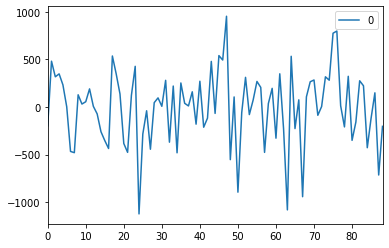

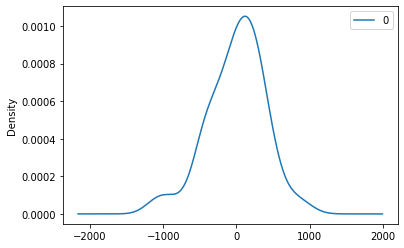

                 0
count    89.000000
mean     -4.137709
std     391.740852
min   -1123.574183
25%    -226.706046
50%      37.049759
75%     269.078170
max     954.451631


In [17]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Rolling Forecast
We now try to use the model to predict future responses.  

predicted 1644.04, expected 1851.00 , gap: -206.96
predicted 1794.58, expected 2134.00 , gap: -339.42
predicted 1948.26, expected 1685.00 , gap: 263.26


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted 1758.77, expected 1944.00 , gap: -185.23
predicted 2127.89, expected 2077.00 , gap: 50.89
predicted 1795.03, expected 605.00 , gap: 1190.03
predicted 1303.19, expected 1872.00 , gap: -568.81
predicted 2399.31, expected 2133.00 , gap: 266.31
predicted 1610.84, expected 1891.00 , gap: -280.16
predicted 1902.14, expected 623.00 , gap: 1279.14
predicted 1816.10, expected 1977.00 , gap: -160.90
predicted 1729.28, expected 2132.00 , gap: -402.72
predicted 2056.28, expected 2417.00 , gap: -360.72
predicted 1980.56, expected 2046.00 , gap: -65.44
predicted 1753.44, expected 2056.00 , gap: -302.56
predicted 1818.58, expected 2192.00 , gap: -373.42
predicted 2422.56, expected 2744.00 , gap: -321.44
predicted 2245.98, expected 3239.00 , gap: -993.02
predicted 2173.74, expected 3117.00 , gap: -943.26
predicted 2640.58, expected 2471.00 , gap: 169.58
predicted 2701.49, expected 2077.00 , gap: 624.49
predicted 2354.63, expected 2703.00 , gap: -348.37
predicted 2577.89, expected 2121.00 , g

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted 2235.32, expected 2425.00 , gap: -189.68
predicted 2281.12, expected 1536.00 , gap: 745.12


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted 1960.44, expected 1685.00 , gap: 275.44
mean squared error : 266313.60


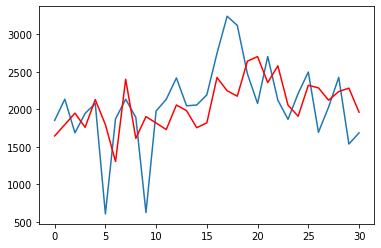

In [22]:
# model prediction
ts_values = ts.values
size = int(len(ts_values) * 0.66)
train , test = ts_values[0:size], ts_values[size:len(ts_values)]
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    model = ARIMA(history, order=(10, 1, 1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    obs = test[i]
    predictions.append(yhat)
    history.append(obs)
    print("predicted %.2f, expected %.2f , gap: %.2f"%(yhat, obs, yhat-obs))
error = mean_squared_error(test, predictions)
print("mean squared error : %.2f"%error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted 1543.91, expected 1851.00 , gap: -307.09
predicted 1747.78, expected 2134.00 , gap: -386.22
predicted 1891.79, expected 1685.00 , gap: 206.79
predicted 1721.07, expected 1944.00 , gap: -222.93
predicted 2129.37, expected 2077.00 , gap: 52.37
predicted 1795.93, expected 605.00 , gap: 1190.93
predicted 1293.06, expected 1872.00 , gap: -578.94
predicted 2366.96, expected 2133.00 , gap: 233.96
predicted 1573.14, expected 1891.00 , gap: -317.86
predicted 1839.11, expected 623.00 , gap: 1216.11
predicted 1780.80, expected 1977.00 , gap: -196.20
predicted 1644.34, expected 2132.00 , gap: -487.66
predicted 1911.74, expected 2417.00 , gap: -505.26
predicted 1904.92, expected 2046.00 , gap: -141.08
predicted 1682.85, expected 2056.00 , gap: -373.15
predicted 1679.15, expected 2192.00 , gap: -512.85
predicted 2438.54, expected 2744.00 , gap: -305.46
predicted 2267.61, expected 3239.00 , gap: -971.39
predicted 2156.07, expected 3117.00 , gap: -960.93
predicted 2659.45, expected 2471.00 ,

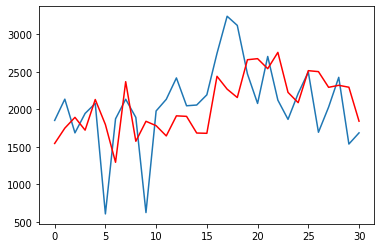

In [23]:
# model prediction
ts_values = ts.values
size = int(len(ts_values) * 0.66)
train , test = ts_values[0:size], ts_values[size:len(ts_values)]
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    model = ARIMA(history, order=(10, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    obs = test[i]
    predictions.append(yhat)
    history.append(obs)
    print("predicted %.2f, expected %.2f , gap: %.2f"%(yhat, obs, yhat-obs))
error = mean_squared_error(test, predictions)
print("mean squared error : %.2f"%error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()